# Filtering Seismograms
- The link to this tutorial can be found [here](https://docs.obspy.org/tutorial/code_snippets/filtering_seismograms.html)
- The following script shows how to filter a seismogram. The example uses a zero-phase-shift low-pass filter with a corner frequency of 1 Hz using 2 corners. This is done in two runs forward and backward, so we end up with 4 corners de facto.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy

In [2]:
# Read the seismogram
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

# There is only one trace in the Stream object, let's work on that trace...
tr = st[0]

# Filtering with a lowpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=1.0, corners=2, zerophase=True)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples

In [3]:
print(tr.stats, "\n")
print(tr_filt.stats)

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999}) 

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})
  

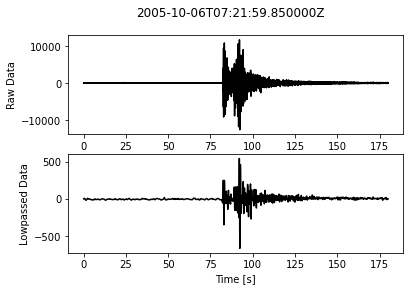

In [4]:
# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)

# Unfiltered Data
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')

# Filtered Data
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Lowpassed Data')

plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

### Looking behind the scenes

In [5]:
# These are the values that are plotted on the Y-axis
print(tr.data[17500: 17600])

# On the X-axis, the time is plotted in seconds
# For this data, the sampling_rate = 200, i.e., 200 samples are recorded in a single second
# Total #samples = 36000, i.e., this data represents observations recorded across 180 seconds

[   80   134   197   148    30  -123  -246  -215  -106    30   126    97
   107   225   395   497   433   339   328   324   194   -42  -268  -400
  -412  -377  -324  -286  -325  -471  -710  -954 -1213 -1489 -1751 -1950
 -1877 -1513  -810    54   553   595   305   -91  -419  -656  -650  -373
    11   332   567   873  1394  2139  2994  3700  4001  3710  2891  1913
  1078   545   230   -69  -380  -668  -855  -929  -947  -857  -793  -968
 -1365 -1940 -2447 -2625 -2418 -1880 -1287  -854  -617  -470  -356  -299
  -253  -237  -173     9   176   287   393   437   469   635   879  1119
  1220  1007   424  -461]
